<a href="https://colab.research.google.com/github/Matheus-Pombeiro/student_performance/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance

## Initial settings

In [1]:
# Importing usefull libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the dataset url
url = 'https://raw.githubusercontent.com/Matheus-Pombeiro/student_performance/refs/heads/main/student_performance.csv'

In [3]:
# Reading the dataset
data = pd.read_csv(url, low_memory=False)
data.head()

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
0,2024-2025,07,1,ELE,West Junior High,2000.0,Y,N,N,N,0HRJHI993
1,2024-2025,07,1,ELE,West Junior High,2000.0,N,N,N,N,CKN322II4
2,2024-2025,07,1,ELE,West Junior High,1950.0,N,N,N,N,V523OZUH8
3,2024-2025,07,1,ELE,West Junior High,1850.0,Y,N,N,N,OJDYS3434
4,2024-2025,07,1,ELE,West Junior High,1500.0,N,N,Y,Y,49RSM3UF6


In [4]:
# Finding the dataset shape
data.shape

(200994, 11)

In [5]:
# Finding information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200994 entries, 0 to 200993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   schoolyear       200994 non-null  object 
 1   gradeLevel       200994 non-null  object 
 2   classPeriod      200994 non-null  object 
 3   classType        200994 non-null  object 
 4   schoolName       200994 non-null  object 
 5   gradePercentage  200994 non-null  float64
 6   avid             200994 non-null  object 
 7   sped             200994 non-null  object 
 8   migrant          200994 non-null  object 
 9   ell              200994 non-null  object 
 10  student_ID       200994 non-null  object 
dtypes: float64(1), object(10)
memory usage: 16.9+ MB


In [6]:
# Declaring binary values for categorical variables
mapping = {
    'N': '0',
    'Y': '1'
}

In [7]:
# Identifying unique values present in the dataset columns
for col in data.columns:
  print(f'Column: {col}')
  print(data[col].unique())
  print('-' * 30)

Column: schoolyear
['2024-2025' '2020-2021' '2021-2022' '2022-2023' '2023-2024' '2018-2019']
------------------------------
Column: gradeLevel
['07' '08' '06' '04' '03' '02' 'KG' '05' '01' 'UE']
------------------------------
Column: classPeriod
['1' '4' '7' '3' '2' '5' '9' '6' '0' '8' '15' '3-18' '2-27' '2-17' '12'
 '4-29' '5-30' '14' '18' '17' '19' '16' '3-28' '5-20' '13' '4-19' '2-22'
 '3-23' '4-24' '5-25']
------------------------------
Column: classType
['ELE' 'MAT' 'SOC' 'ENG' 'MUS' 'ART' 'SCI' 'MS' 'PE' 'IN']
------------------------------
Column: schoolName
['West Junior High' 'Allfeather Middle School' 'North Junior High'
 'East Junior High' 'Cloudy Elementary School' 'Hall Elementary School'
 'Maria Flowers Elementary School' 'Washington Stone Elementary School'
 'Gale Elementary School' 'South Junior High' 'Seaside Elementary School'
 'Rocky Elementary School' 'Sunny Hillside Elementary School'
 'Grand River Elementary School' 'Tulip Beach Elementary School'
 'Online Learnin

In [8]:
# Getting the name of the columns with binary values
columns = ['avid', 'sped', 'migrant', 'ell']

In [9]:
# Replacing the string values by numerical ones in the binary columns
data[columns] = data[columns].replace(mapping)

# Converting the columns data type
data[columns] = data[columns].astype(int)

# Showing the dataframe
data.head()

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
0,2024-2025,07,1,ELE,West Junior High,2000.0,1,0,0,0,0HRJHI993
1,2024-2025,07,1,ELE,West Junior High,2000.0,0,0,0,0,CKN322II4
2,2024-2025,07,1,ELE,West Junior High,1950.0,0,0,0,0,V523OZUH8
3,2024-2025,07,1,ELE,West Junior High,1850.0,1,0,0,0,OJDYS3434
4,2024-2025,07,1,ELE,West Junior High,1500.0,0,0,1,1,49RSM3UF6


In [10]:
# Verifying the dtyoe of each column again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200994 entries, 0 to 200993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   schoolyear       200994 non-null  object 
 1   gradeLevel       200994 non-null  object 
 2   classPeriod      200994 non-null  object 
 3   classType        200994 non-null  object 
 4   schoolName       200994 non-null  object 
 5   gradePercentage  200994 non-null  float64
 6   avid             200994 non-null  int64  
 7   sped             200994 non-null  int64  
 8   migrant          200994 non-null  int64  
 9   ell              200994 non-null  int64  
 10  student_ID       200994 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 16.9+ MB


## Dealing with outliers

In [11]:
# Finding statistic information about the numeric columns
data.describe()

# the 'avid', 'sped', 'migrant' and 'ell' are based on binary kinds of data (true or false)

,gradePercentage,avid,sped,migrant,ell
count,200994.000000,200994.000000,200994.000000,200994.000000,200994.000000
mean,81.183078,0.524448,0.120586,0.128571,0.103356
std,24.594533,0.499403,0.325646,0.334725,0.304424
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.800000,0.000000,0.000000,0.000000,0.000000
50%,88.500000,1.000000,0.000000,0.000000,0.000000
75%,97.900000,1.000000,0.000000,0.000000,0.000000
max,2000.000000,1.000000,1.000000,1.000000,1.000000


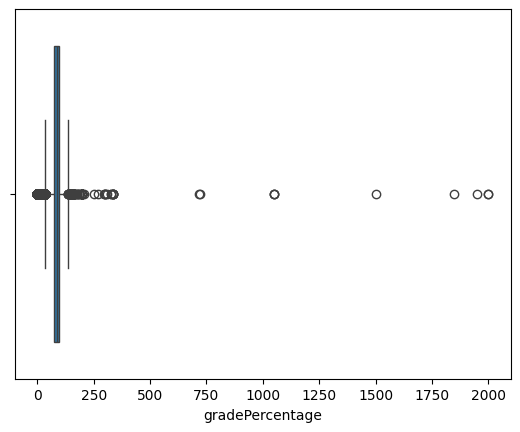

In [12]:
# Verifying the presence of outliers
sns.boxplot(x=data['gradePercentage']);

In [13]:
# Finding the 1º and 3º quantiles
Q1 = data['gradePercentage'].quantile(.25)
Q3 = data['gradePercentage'].quantile(.75)

# Calculating the interquartile range (IQR)
IQR = Q3 - Q1

# Calculating the limits
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [14]:
# Finding the outlier indices
outlier_indices = (data['gradePercentage'] < lower_fence) | (data['gradePercentage'] > upper_fence)
outlier_indices

,gradePercentage
0,True
1,True
2,True
3,True
4,True
...,...
200989,True
200990,True
200991,True
200992,True


In [15]:
# Filtering the data by outliers
data[outlier_indices]['gradePercentage']

,gradePercentage
0,2000.0
1,2000.0
2,1950.0
3,1850.0
4,1500.0
...,...
200989,0.0
200990,0.0
200991,0.0
200992,0.0


In [16]:
# Determining a dataframe with no outliers
data = data[~outlier_indices]

# Resetting the index
data.reset_index(inplace=True)

# Showing the dataframe
data

,index,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
0,98,2023-2024,06,2,ELE,North Junior High,135.20,1,1,0,0,19US90QZQ
1,99,2023-2024,06,2,ELE,North Junior High,135.20,1,0,0,0,90OI94XPI
2,100,2023-2024,06,2,ELE,North Junior High,135.20,1,0,0,0,QI5H6D91H
3,101,2018-2019,07,7,ELE,North Junior High,134.60,0,0,0,0,G5X2RF4C3
4,102,2018-2019,06,7,ELE,North Junior High,134.60,0,0,0,0,8RQQBT176
...,...,...,...,...,...,...,...,...,...,...,...,...
189360,189458,2021-2022,07,5,MAT,West Junior High,35.20,0,1,1,0,JLRKC2527
189361,189459,2023-2024,05,8,ENG,Cloudy Elementary School,35.20,1,0,0,0,03QMFI0D6
189362,189460,2024-2025,03,6,ENG,Maria Flowers Elementary School,35.20,1,0,1,1,734U9QNWQ
189363,189461,2024-2025,07,3,SCI,South Junior High,35.20,0,0,0,1,K25PR3M1P


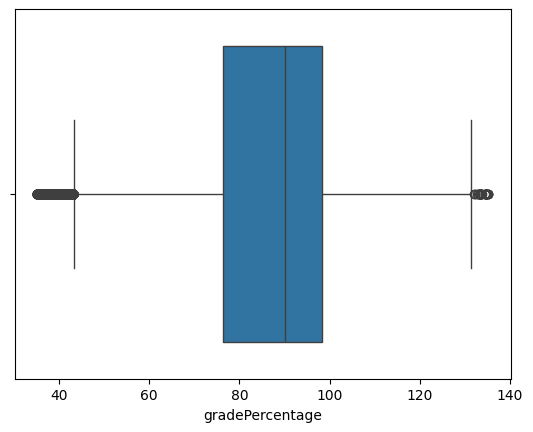

In [17]:
# Verifying the presence of outliers again
sns.boxplot(x=data['gradePercentage']);

## Best grade percentage performances

In [18]:
# Finding the school with best grade percentage performances
schools = data.groupby('schoolName')['gradePercentage'].mean().sort_values(ascending=False).head(5)
schools

,gradePercentage
schoolName,
Tulip Beach Elementary School,92.604030
Gale Elementary School,91.835782
Seaside Elementary School,91.072721
Cloudy Elementary School,90.875519
Rocky Elementary School,89.969759


In [33]:
# Resetting the index
schools = schools.reset_index()

# Converting into a dataframe
schools.columns = ['School', 'Grade Percentage']

# Showing the dataframe
schools

,School,Grade Percentage
0,Tulip Beach Elementary School,92.604030
1,Gale Elementary School,91.835782
2,Seaside Elementary School,91.072721
3,Cloudy Elementary School,90.875519
4,Rocky Elementary School,89.969759


In [19]:
# Setting the style
sns.set_style()

# Setting the theme
sns.set_theme(style='ticks')

# Setting the palette
sns.set_palette('Set1')

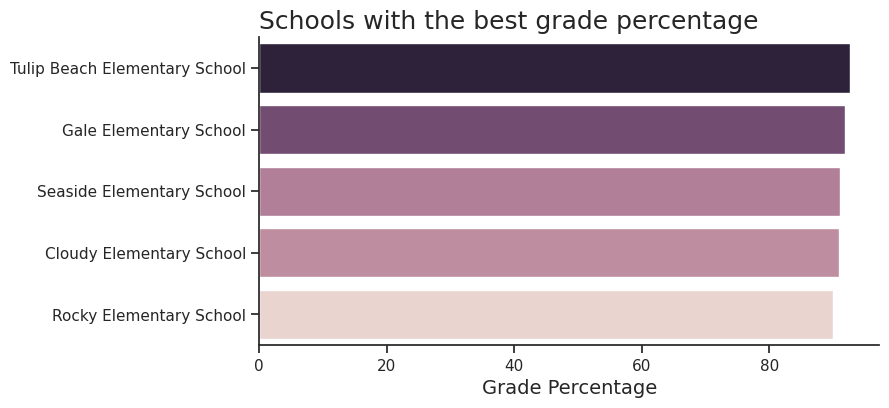

In [35]:
# Making a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a chart about the schools with the best grade percentage performances
ax = sns.barplot(data=schools, x=schools['Grade Percentage'], y=schools['School'],
                 orient='h', hue=schools['Grade Percentage'], legend=False)

# Setting a title
ax.set_title('Schools with the best grade percentage', loc='left', fontsize=18)

# Setting labels
ax.set_xlabel('Grade Percentage', fontsize=14)
ax.set_ylabel('')

# Setting a numeric interval
ax.xaxis.set_major_locator(plt.MultipleLocator(20))

# Removing the borders
sns.despine()

# Writing the chart
fig.savefig('schools_best_grade_percentage.png', transparent=False, dpi=300, bbox_inches='tight')

# Showing the chart
plt.show()

In [21]:
# Finding the class types with best grade percentages
class_types = data.groupby('classType')['gradePercentage'].mean().sort_values(ascending=False).head(5)
class_types

,gradePercentage
classType,
PE,94.525912
MUS,94.212847
ART,93.753543
MS,87.671872
ELE,86.187806


In [36]:
# Resitting the index
class_types = class_types.reset_index()

# Converting into a dataframe
class_types.columns = ['Subject', 'Grade Percentage']

# Showing the dataframe
class_types

,Subject,Grade Percentage
0,PE,94.525912
1,MUS,94.212847
2,ART,93.753543
3,MS,87.671872
4,ELE,86.187806


In [22]:
# Setting the palette
sns.set_palette('Set2')

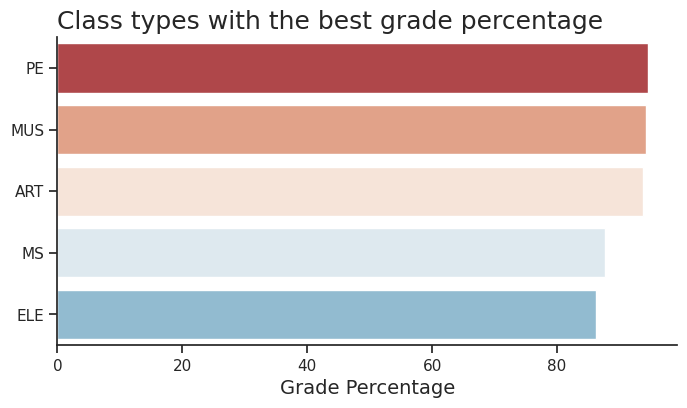

In [37]:
# Making a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a chart about the class types with the best grade percentage performances
ax = sns.barplot(data=class_types, x=class_types['Grade Percentage'], y=class_types['Subject'],
                 orient='h', hue=class_types['Subject'])

# Setting a title
ax.set_title('Class types with the best grade percentage', loc='left', fontsize=18)

# Setting labels
ax.set_xlabel('Grade Percentage', fontsize=14)
ax.set_ylabel('')

# Setting a numeric interval
ax.xaxis.set_major_locator(plt.MultipleLocator(20))

# Removing the borders
sns.despine()

# Wrinting the chart
fig.savefig('class_types_best_grade_percentage.png', transparent=False, dpi=300, bbox_inches='tight')

# Showing the chart
plt.show()

## English learner laguage program

In [24]:
# Finding the number of students registered in the ELL program by school
ell = data.groupby('schoolName')['ell'].sum().sort_values(ascending=False).head()
ell

,ell
schoolName,
Gale Elementary School,2196
Hall Elementary School,1835
West Junior High,1525
South Junior High,1486
Leafy Elementary School,1429


In [39]:
# Resetting the index
ell = ell.reset_index()

# Converting into a dataframe
ell.columns = ['School', 'ELL']

# Showing the dataframe
ell

,School,ELL
0,Gale Elementary School,2196
1,Hall Elementary School,1835
2,West Junior High,1525
3,South Junior High,1486
4,Leafy Elementary School,1429


In [38]:
# Setting a palette
sns.set_palette('Set3')

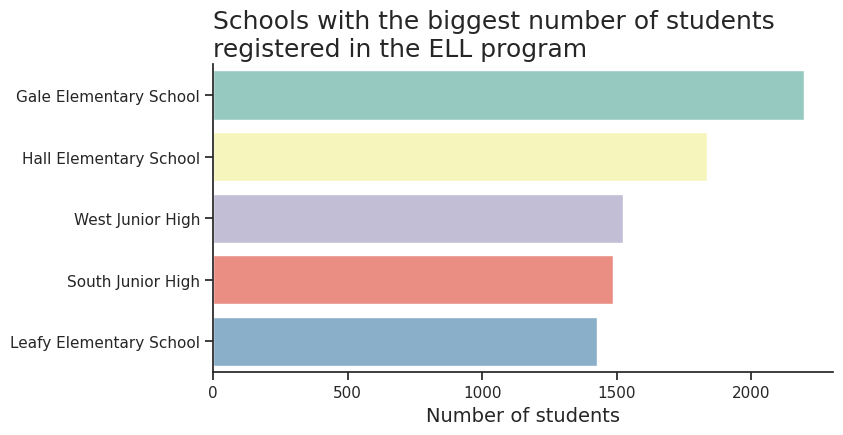

In [40]:
# Making a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a chart about the number of students registered in the ELL program by school
ax = sns.barplot(data=ell, x=ell['ELL'], y=ell['School'],
                 orient='h', hue=ell['School'])

# Setting a title
ax.set_title('Schools with the biggest number of students \nregistered in the ELL program',
             loc='left', fontsize=18)

# Setting labels
ax.set_xlabel('Number of students', fontsize=14)
ax.set_ylabel('')

# Setting an interval of values
ax.xaxis.set_major_locator(plt.MultipleLocator(500))

# Removing the borders (frames)
sns.despine()

# Writing the chart
fig.savefig('students_registered_ell.png', transparent=False, dpi=300, bbox_inches='tight')

# Showing the chart
plt.show()

## Average of students registered in each program

In [27]:
# Finding the average of students registered in each program
programs = data[['avid',	'sped',	'migrant',	'ell']].mean().sort_values(ascending=False)
programs

,0
avid,0.538405
migrant,0.125572
sped,0.119230
ell,0.104127


In [29]:
# Resetting the index
programs = programs.reset_index()

# Converting into a dataframe
programs.columns = ['Program', 'Average of Students']

# Showing the dataframe
programs

,Program,Average of Students
0,avid,0.538405
1,migrant,0.125572
2,sped,0.119230
3,ell,0.104127


In [30]:
# Setting a palette
sns.set_palette('RdBu')

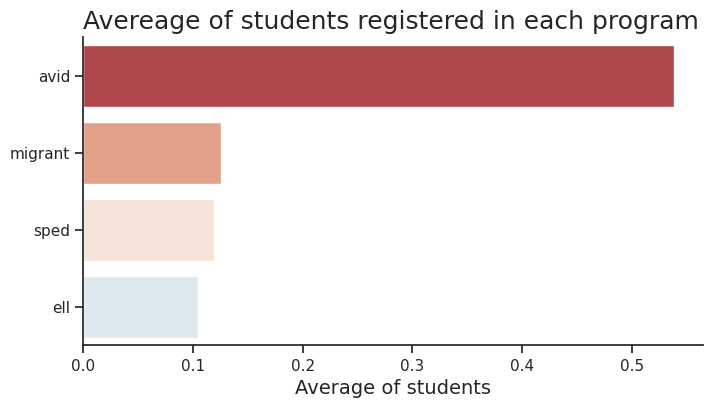

In [32]:
# Making a figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plotting a chart about the average of students registered in each program
ax = sns.barplot(data=programs, x=programs['Average of Students'], y=programs['Program'], orient='h', hue=programs['Program'])

# Setting a title
ax.set_title('Avereage of students registered in each program', loc='left', fontsize=18)

# Setting labels
ax.set_xlabel('Average of students', fontsize=14)
ax.set_ylabel('')

# Setting an interval
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))

# Removing the borders (frames)
sns.despine()

# Writing the chart
fig.savefig('average_students_programs.png', transparent=False, dpi=300, bbox_inches='tight')

# Showing the chart
plt.show()